In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [18]:
#Load the  MNISt datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()


In [19]:
# Preprocess the datasets
x_train = x_train.reshape((-1,28,28,1))/255.0
x_test = x_test.reshape((-1,28,28,1))/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input

In [24]:
#Build the CNN Model
model = Sequential([
    Input(shape = (28,28,1)),
    Conv2D(32,(3,3),activation = 'relu'), 
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [25]:
#compile and train the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=120, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.8493 - loss: 0.5426 - val_accuracy: 0.9803 - val_loss: 0.0644
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.9798 - loss: 0.0678 - val_accuracy: 0.9843 - val_loss: 0.0496
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.9848 - loss: 0.0503 - val_accuracy: 0.9867 - val_loss: 0.0389
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.9883 - loss: 0.0360 - val_accuracy: 0.9897 - val_loss: 0.0326
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9888 - val_loss: 0.0348
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9910 - val_loss: 0.0294
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.9947 - loss: 0.0163 - val_accuracy: 0.9905 - val_loss: 0.0335
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.9952 - loss: 0.0151 - 

In [26]:
#Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9861 - loss: 0.0498
Test Loss: 0.0395
Test Accuracy: 0.9885


In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Select random images from the test
random_index = np.random.choice(len(x_test),size = 5, replace = False)
images = x_test[random_indexes]
true_labels = np.argmax(y_test[random_index],axis=1)

In [30]:
#Make Predictions using the trained model
predictions = np.argmax(model.predict(images),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


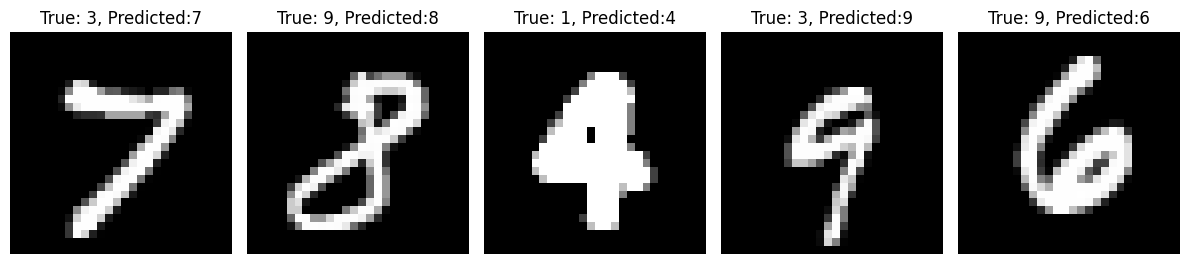

In [39]:
fig , axes = plt.subplots(1,5, figsize=(12,4))
for i , (image,true_label,predicted_label) in enumerate(zip(images, true_labels, predictions)):
    axes[i].imshow(image.squeeze(),cmap='gray')
    axes[i].set_title(f'True: {true_label}, Predicted:{predicted_label}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
/  